In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## 01. DATA GATHERING

In [26]:
import pandas as pd

# Read the file that has been merged in form of excel
df = pd.read_excel(r"C:\#1 MyData\Kalibrasi Labjack U6 Pro\4b_calibrated_thermometer.xlsx")

# Dataframe of data
df


,Tref,actual_value,kesalahan,ketidakpastian
0,10,9.98,0.02,0.3
1,30,29.76,0.24,0.3
2,50,49.76,0.24,0.3
3,70,69.81,0.19,0.3
4,90,89.84,0.16,0.3
5,110,109.85,0.15,0.3


## 02. DATA CLEANING

In [27]:
# Read information of the data shape (rows, coloumn)
df.shape

(6, 4)

In [28]:
# Data description of its Statistics
df.describe(include='all')

,Tref,actual_value,kesalahan,ketidakpastian
count,6.000000,6.000000,6.000000,6.0
mean,60.000000,59.833333,0.166667,0.3
std,37.416574,37.397415,0.081404,0.0
min,10.000000,9.980000,0.020000,0.3
25%,35.000000,34.760000,0.152500,0.3
50%,60.000000,59.785000,0.175000,0.3
75%,85.000000,84.832500,0.227500,0.3
max,110.000000,109.850000,0.240000,0.3


In [29]:
# Numerical Data Check
num_df = df.select_dtypes(include=['int64', 'float64'])
num_df

,Tref,actual_value,kesalahan,ketidakpastian
0,10,9.98,0.02,0.3
1,30,29.76,0.24,0.3
2,50,49.76,0.24,0.3
3,70,69.81,0.19,0.3
4,90,89.84,0.16,0.3
5,110,109.85,0.15,0.3


In [30]:
# Cathegorical Data Check

cat_df = df.drop(num_df, axis = 1)
cat_df

""
0
1
2
3
4
5


In [31]:
# Summary Info of Data Information (Check Null, NaN, and Duplicates again)

def check_values(df):
    data = []
    for col in df.columns:
        data.append([col, \
                  df[col].dtype, \
                  df[col].isna().sum(), \
                  round(100*(df[col].isna().sum()/len(df)), 2), \
                  df[col].nunique(), \
                  df[col].unique()
                  ])

    return pd.DataFrame(columns=['kolom', 'dataType', 'null', 'nullPercentage', 'unique', 'values'], data=data)

check_values(df)

,kolom,dataType,null,nullPercentage,unique,values
0,Tref,int64,0,0.0,6,"[10, 30, 50, 70, 90, 110]"
1,actual_value,float64,0,0.0,6,"[9.98, 29.76, 49.76, 69.81, 89.84, 109.85]"
2,kesalahan,float64,0,0.0,5,"[0.02, 0.24, 0.19, 0.16, 0.15]"
3,ketidakpastian,float64,0,0.0,1,[0.3]


## 03. DATA PREPARATION

In [32]:
df

,Tref,actual_value,kesalahan,ketidakpastian
0,10,9.98,0.02,0.3
1,30,29.76,0.24,0.3
2,50,49.76,0.24,0.3
3,70,69.81,0.19,0.3
4,90,89.84,0.16,0.3
5,110,109.85,0.15,0.3


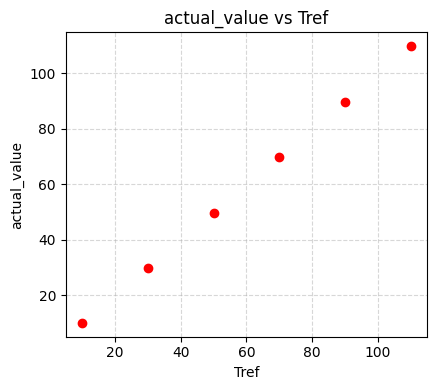

In [33]:
import matplotlib.pyplot as plt

# List warna
colors = ['red', 'green', 'blue']

plt.figure(figsize=(12, 4))
for i, (col, color) in enumerate(zip(['Tref'], colors), 1):
    plt.subplot(1, 3, i)
    plt.scatter(df[col], df['actual_value'], label=f'actual_value vs {col}', color=color)
    plt.xlabel(col)
    plt.ylabel('actual_value')
    plt.title(f'actual_value vs {col}')
    plt.grid(alpha=0.5, linestyle='--')

plt.tight_layout()
plt.show()


## 04. Exploratory Data Analysis (EDA)

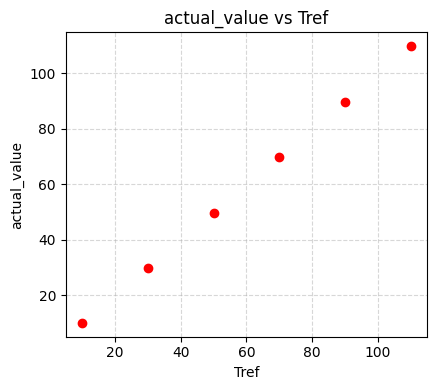

In [34]:
import matplotlib.pyplot as plt

# List warna
colors = ['red', 'green', 'blue']

plt.figure(figsize=(12, 4))
for i, (col, color) in enumerate(zip(['Tref'], colors), 1):
    plt.subplot(1, 3, i)
    plt.scatter(df[col], df['actual_value'], label=f'actual_value vs {col}', color=color)
    plt.xlabel(col)
    plt.ylabel('actual_value')
    plt.title(f'actual_value vs {col}')
    plt.grid(alpha=0.5, linestyle='--')

plt.tight_layout()
plt.show()


# 05. Data Modeling


LINEAR REGRESSION (ORDE 1)


Regression for actual_value vs Tref (Order 1):
Intercept  (β₀)    : -0.13580952381252
Coefficient  (β₁)   : 0.99948571428575
R-squared (R²)  : 1.00000


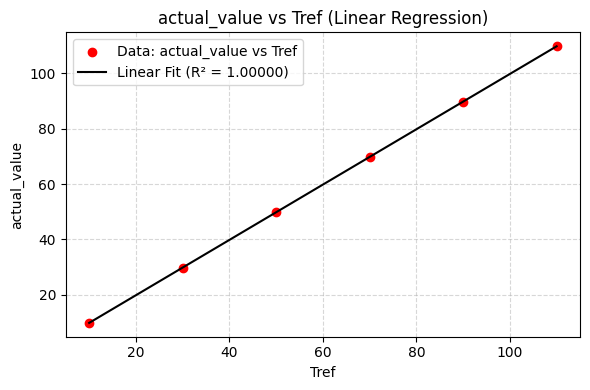

In [35]:
import numpy as np
import matplotlib.pyplot as plt

def least_squares_regression(X, Y):
    # Menambahkan kolom ones untuk intercept (konstanta)
    X_design = np.column_stack((np.ones(X.shape[0]), X))
    # Menggunakan Least Squares dengan pseudo-inverse
    p = np.linalg.pinv(X_design.T @ X_design) @ X_design.T @ Y
    return p[0], p[1]  # Intercept, Coefficient

# Warna untuk setiap variabel
colors = {'Tref': 'red'}

# Loop untuk regresi actual_value terhadap Tref
for Ti in ["Tref"]:
    print(f"\nRegression for actual_value vs {Ti} (Order 1):")

    X = df[Ti].values
    Y = df["actual_value"].values

    # Regresi
    intercept_LSM, coefficient_LSM = least_squares_regression(X, Y)

    # Prediksi
    Y_pred = intercept_LSM + coefficient_LSM * X

    # Hitung R-squared
    ss_res = np.sum((Y - Y_pred) ** 2)
    ss_tot = np.sum((Y - np.mean(Y)) ** 2)
    r_squared = 1 - (ss_res / ss_tot)

    # Tampilkan hasil regresi dan R²
    print(f"Intercept  (β₀)    : {intercept_LSM:.14f}")
    print(f"Coefficient  (β₁)   : {coefficient_LSM:.14f}")
    print(f"R-squared (R²)  : {r_squared:.5f}")

    # Plot
    plt.figure(figsize=(6, 4))
    plt.scatter(X, Y, label=f"Data: actual_value vs {Ti}", color=colors[Ti])
    X_plot = np.linspace(min(X), max(X), 100)
    Y_plot = intercept_LSM + coefficient_LSM * X_plot
    plt.plot(X_plot, Y_plot, color='black', label=f"Linear Fit (R² = {r_squared:.5f})")

    plt.xlabel(Ti)
    plt.ylabel("actual_value")
    plt.title(f"actual_value vs {Ti} (Linear Regression)")
    plt.legend()
    plt.grid(alpha=0.5, linestyle="--")
    plt.tight_layout()
    plt.show()


REGRESSION ORDE 2 (NON LINEAR)


Quadratic Regression for actual_value vs Tref:
Intercept (β₀)       : 0.0021517860
Linear Coef (β₁)     : 0.9926821428
Quadratic Coef (β₂)  : 0.0000566964
R-squared (R²)   : 1.00000


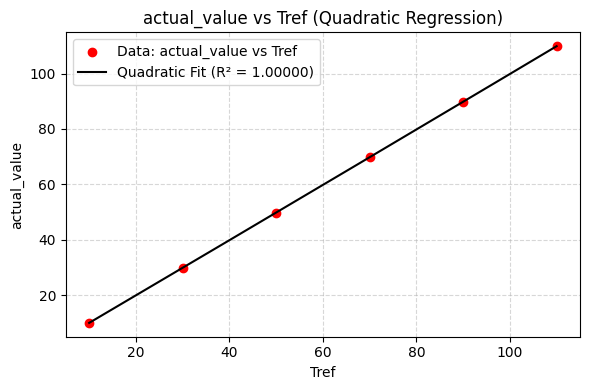

In [36]:
import numpy as np
import matplotlib.pyplot as plt

def quadratic_regression(X, Y):
    # Menyusun X dengan orde 2: [1, X, X^2]
    X_design = np.column_stack((np.ones(X.shape[0]), X, X**2))
    # Hitung parameter regresi dengan Least Squares
    p = np.linalg.pinv(X_design.T @ X_design) @ X_design.T @ Y
    return p  # p[0]=intercept, p[1]=koef linear, p[2]=koef kuadratik

# Warna untuk setiap kolom
colors = {'Tref': 'red'}

# Loop untuk Tref, T2, T3
for Ti in ['Tref']:
    print(f"\nQuadratic Regression for actual_value vs {Ti}:")

    X = df[Ti].values
    Y = df['actual_value'].values

    # Jalankan regresi orde 2
    p = quadratic_regression(X, Y)

    # Prediksi Y menggunakan model kuadratik
    Y_pred = p[0] + p[1]*X + p[2]*X**2

    # Hitung R-squared
    ss_res = np.sum((Y - Y_pred)**2)
    ss_tot = np.sum((Y - np.mean(Y))**2)
    r_squared = 1 - (ss_res / ss_tot)

    # Tampilkan hasil regresi
    print(f"Intercept (β₀)       : {p[0]:.10f}")
    print(f"Linear Coef (β₁)     : {p[1]:.10f}")
    print(f"Quadratic Coef (β₂)  : {p[2]:.10f}")
    print(f"R-squared (R²)   : {r_squared:.5f}")

    # Plot
    plt.figure(figsize=(6, 4))
    plt.scatter(X, Y, color=colors[Ti], label=f'Data: actual_value vs {Ti}')

    X_plot = np.linspace(X.min(), X.max(), 200)
    Y_plot = p[0] + p[1]*X_plot + p[2]*X_plot**2
    plt.plot(X_plot, Y_plot, color='black', label=f'Quadratic Fit (R² = {r_squared:.5f})')

    plt.xlabel(Ti)
    plt.ylabel('actual_value')
    plt.title(f'actual_value vs {Ti} (Quadratic Regression)')
    plt.legend()
    plt.grid(alpha=0.5, linestyle='--')
    plt.tight_layout()
    plt.show()


# 06. SUMMARY EQUATION FOR DAQFACTORY

In [37]:
# Equation for DaqFactory Using Linear Regression :

for Ti in ['Tref']:
    X = df[Ti].values
    Y = df['actual_value'].values
    p = least_squares_regression(X, Y)
    print(f"Regression Model for {Ti}:")
    print(f"------------------------------------------")
    print(f"{p[0]:.14f} + {p[1]:.14f} * (T1[0])\n")
    print(f"{p[0]:.14f} + {p[1]:.14f} * (T2[0])\n")
    print(f"{p[0]:.14f} + {p[1]:.14f} * (T3[0])\n")

    

Regression Model for Tref:
------------------------------------------
-0.13580952381252 + 0.99948571428575 * (T1[0])

-0.13580952381252 + 0.99948571428575 * (T2[0])

-0.13580952381252 + 0.99948571428575 * (T3[0])



In [38]:
# Equation for DaqFactory Using Non-Linear Regression (Orde 2) :

for Ti in ['Tref']:
    X = df[Ti].values
    Y = df['actual_value'].values
    p = quadratic_regression(X, Y)
    print(f"Regression Model for {Ti}:")
    print(f"------------------------------------------")
    print(f"Smooth(({p[0]:.14f} + ({p[1]:.14f} * (T1[0])) + ({p[2]:.14f} * ((T1[0])^2))),3)\n")
    print(f"Smooth(({p[0]:.14f} + ({p[1]:.14f} * (T2[0])) + ({p[2]:.14f} * ((T2[0])^2))),3)\n")
    print(f"Smooth(({p[0]:.14f} + ({p[1]:.14f} * (T3[0])) + ({p[2]:.14f} * ((T3[0])^2))),3)\n")

    

Regression Model for Tref:
------------------------------------------
Smooth((0.00215178599461 + (0.99268214284762 * (T1[0])) + (0.00005669642864 * ((T1[0])^2))),3)

Smooth((0.00215178599461 + (0.99268214284762 * (T2[0])) + (0.00005669642864 * ((T2[0])^2))),3)

Smooth((0.00215178599461 + (0.99268214284762 * (T3[0])) + (0.00005669642864 * ((T3[0])^2))),3)



# CONFIDENCE INTERVAL 95% REGRESI DENGAN ALAT UKUR STANDAR


Quadratic Regression for actual_value vs Tref:
Intercept (β₀)       : 0.0021517860
Linear Coef (β₁)     : 0.9926821428
Quadratic Coef (β₂)  : 0.0000566964
Sigma^2 (variance)   : 0.0040269048
R-squared (R²)       : 1.00000

Prediksi dengan Confidence Interval:
    Tref     y_pred   CI_lower   CI_upper  Interval (±)
0     25  24.854641  24.736497  24.972784      0.118143
1     30  29.833643  29.721720  29.945565      0.111922
2     35  34.815480  34.703936  34.927024      0.111544
3     40  39.800152  39.685517  39.914786      0.114635
4     45  44.787658  44.668651  44.906666      0.119007
5     50  49.778000  49.654921  49.901079      0.123079
6     55  54.771176  54.645310  54.897043      0.125866
7     60  59.767187  59.640338  59.894037      0.126849
8     65  64.766033  64.640167  64.891900      0.125866
9     70  69.767714  69.644635  69.890793      0.123079
10    75  74.772230  74.653223  74.891237      0.119007
11    80  79.779580  79.664946  79.894215      0.114635


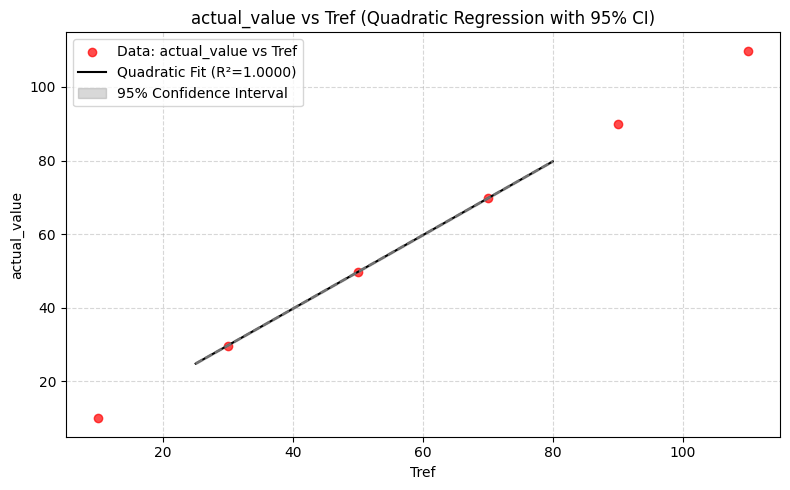

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import t

def quadratic_regression(X, Y):
    X_design = np.column_stack((np.ones(X.shape[0]), X, X**2))
    p = np.linalg.pinv(X_design.T @ X_design) @ X_design.T @ Y
    return p, X_design

colors = {'Tref': 'red'}

for Ti in ['Tref']:
    print(f"\nQuadratic Regression for actual_value vs {Ti}:")

    X = df[Ti].values
    Y = df['actual_value'].values

    p, X_design = quadratic_regression(X, Y)

    Y_pred = p[0] + p[1]*X + p[2]*X**2

    residuals = Y - Y_pred
    n = len(Y)
    p_param = 3
    sigma_hat_squared = np.sum(residuals**2) / (n - p_param)
    sigma_hat = np.sqrt(sigma_hat_squared)

    XtX_inv = np.linalg.pinv(X_design.T @ X_design)

    X_plot = np.arange(25, 85, 5)  # 50 titik supaya tidak terlalu padat cetakannya
    X_plot_design = np.column_stack((np.ones(X_plot.shape[0]), X_plot, X_plot**2))
    Y_plot = p[0] + p[1]*X_plot + p[2]*X_plot**2

    t_value = t.ppf(1 - 0.05/2, df=n - p_param)

    margin_errors = []
    for x0 in X_plot_design:
        var_pred = sigma_hat_squared * (x0 @ XtX_inv @ x0.T)
        margin_error = t_value * np.sqrt(var_pred)
        margin_errors.append(margin_error)
    margin_errors = np.array(margin_errors)

    CI_lower = Y_plot - margin_errors
    CI_upper = Y_plot + margin_errors
    Interval_CI = (CI_upper-CI_lower)/2

    ss_res = np.sum((Y - Y_pred)**2)
    ss_tot = np.sum((Y - np.mean(Y))**2)
    r_squared = 1 - (ss_res / ss_tot)

    print(f"Intercept (β₀)       : {p[0]:.10f}")
    print(f"Linear Coef (β₁)     : {p[1]:.10f}")
    print(f"Quadratic Coef (β₂)  : {p[2]:.10f}")
    print(f"Sigma^2 (variance)   : {sigma_hat_squared:.10f}")
    print(f"R-squared (R²)       : {r_squared:.5f}")

    # Buat DataFrame hasil prediksi dan CI supaya bisa lihat nilai-nilai numeriknya
    df_CI = pd.DataFrame({
        Ti: X_plot,
        'y_pred': Y_plot,
        'CI_lower': CI_lower,
        'CI_upper': CI_upper,
        'Interval (±)' : Interval_CI
    })
    print("\nPrediksi dengan Confidence Interval:")
    print(df_CI)

    plt.figure(figsize=(8, 5))
    plt.scatter(X, Y, color=colors[Ti], label=f'Data: actual_value vs {Ti}', alpha=0.7)
    plt.plot(X_plot, Y_plot, color='black', label=f'Quadratic Fit (R²={r_squared:.4f})')

    # Plot area CI
    plt.fill_between(X_plot, CI_lower, CI_upper, color='gray', alpha=0.3, label='95% Confidence Interval')

    # Tambah garis batas CI supaya lebih jelas
    plt.plot(X_plot, CI_lower, color='gray', linestyle='--', alpha=0.7)
    plt.plot(X_plot, CI_upper, color='gray', linestyle='--', alpha=0.7)

    plt.xlabel(Ti)
    plt.ylabel('actual_value')
    plt.title(f'actual_value vs {Ti} (Quadratic Regression with 95% CI)')
    plt.legend()
    plt.grid(alpha=0.5, linestyle='--')
    plt.tight_layout()
    plt.show()


In [40]:
p[0]

np.float64(0.002151785994609412)

In [41]:
p[1]

np.float64(0.992682142847622)

In [42]:
p[2]

np.float64(5.6696428639008145e-05)

In [43]:
tempbox = 23.5
tempboxcalibrated = p[0] + p[1]*tempbox + p[2]*(tempbox**2)

print(f"{tempboxcalibrated:.1f}\n")

23.4



In [44]:
print("Hellow World")

Hellow World
